# Generate insights on credit products to avoid legal disputes

## Plotting the percentage of disputes lodged per product

In [80]:
## analyze the csv file to determine impact of variables on disputes
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

# read specific columns of csv file using Pandas 
df = pd.read_csv("/Users/abhinav_chinta/Code/Abhinav-Chinta-Quant-OA/eda-consumer-finance/consumer_complaints.csv")

## find percentages of case disputed per product
items = df['product'].unique()
result = []
def count_dispute(string, column = 1):
    count = 0
    for row in df.values:
        if (row[column] == string and row[16].lower() == 'yes'):
            count += 1
    return count

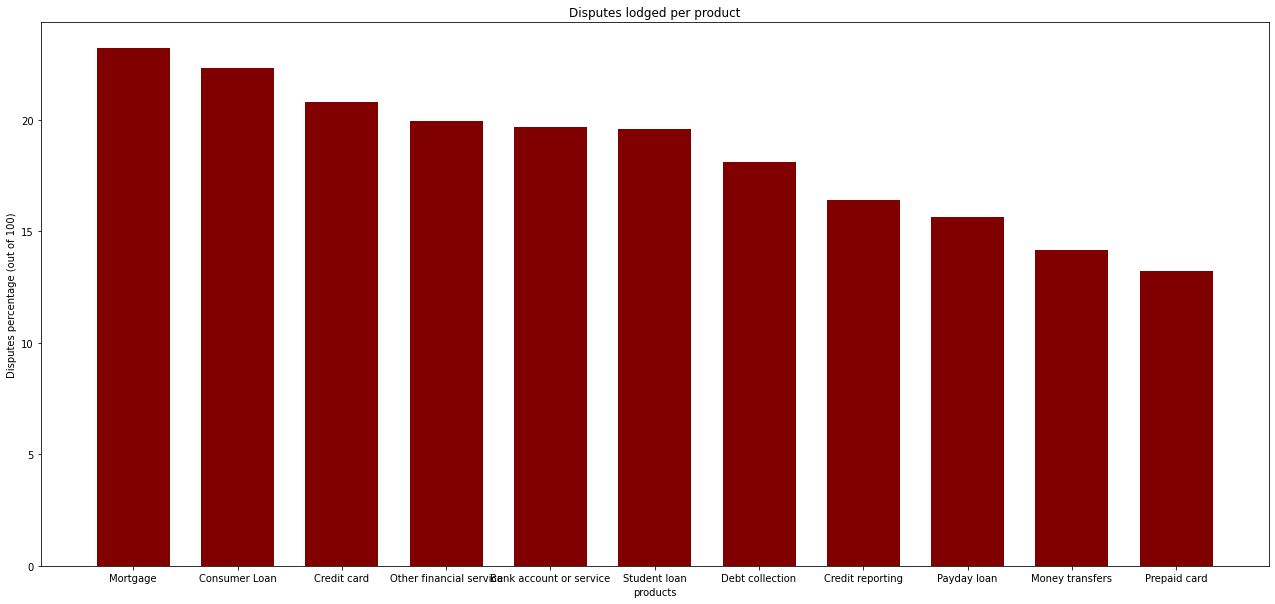

In [81]:
# plotting bar graph for percentage of disputes lodged per product

import numpy as np
import matplotlib.pyplot as plt 

data = {}
for item in items:
    data[item] = count_dispute(item) / list(df["product"]).count(item) * 100

result = dict(sorted(data.items(), key=lambda item:- item[1]))

# creating the dataset
item = list(result.keys())
values = list(result.values())
  
fig = plt.figure(figsize = (22, 10))
 
# creating the bar plot
plt.bar(item, values, color ='maroon',
        width = 0.7)
 
plt.xlabel("products")
plt.ylabel("Disputes percentage (out of 100)")
plt.title("Disputes lodged per product")
plt.show()

## Determining states in which disputes are most prevelant in

In [82]:
# states which disputes are most prevalent in
st_abbrv = pd.read_csv("/Users/abhinav_chinta/Code/Abhinav-Chinta-Quant-OA/eda-consumer-finance/state_abbrev.csv")
st_pop = pd.read_csv("/Users/abhinav_chinta/Code/Abhinav-Chinta-Quant-OA/eda-consumer-finance/state_pop.csv")

# merging cosumer_complaints and state population data
new_df = pd.concat([st_pop, st_abbrv], axis=1, ignore_index=True)
new_df = new_df.drop(new_df.columns[[2,3,4,6]], axis=1)


states = df['state'].unique()
print(states)




['CA' 'NY' 'MD' 'GA' 'AZ' 'IL' 'NC' 'TX' 'DC' 'KY' 'RI' 'TN' 'AR' 'AL'
 'NJ' 'VA' 'FL' 'MN' 'AK' 'OH' 'OR' 'MO' 'LA' 'SC' 'OK' 'WA' 'PA' 'MI'
 'CO' 'KS' 'MA' 'NH' 'NV' 'WV' 'PR' 'DE' 'IN' 'UT' 'ME' 'NE' 'NM' 'WY'
 'CT' 'HI' 'ID' nan 'MS' 'WI' 'IA' 'MT' 'MH' 'VT' 'AE' 'SD' 'FM' 'VI' 'ND'
 'GU' 'MP' 'AP' 'AS' 'PW' 'AA']


In [83]:
# generating a dictionary with states and their corresponding percentage of cases as a metric of total

st_perct = {}
for i in range(len(new_df)):
    st_perct[states[i]] = count_dispute(states[i], 8) / new_df[1][i] * 100
print(st_perct)


{'CA': 0.35925627933679843, 'NY': 1.0201696409653542, 'MD': 0.053443484614115376, 'GA': 0.1591223286866874, 'AZ': 0.006777649538979369, 'IL': 0.07216861477935436, 'NC': 0.08832388528609338, 'TX': 0.780579277935927, 'DC': 0.08657468873494685, 'KY': 0.00364563547826291, 'RI': 0.003720300114255597, 'TN': 0.11646533019934006, 'AR': 0.024173715001972507, 'AL': 0.008799051059827943, 'NJ': 0.06604063236802012, 'VA': 0.12281819420805243, 'FL': 0.3584577563558202, 'MN': 0.029523199213550323, 'AK': 0.0026028255930462827, 'OH': 0.25799501864289265, 'OR': 0.024199097537415146, 'MO': 0.021066367326934787, 'LA': 0.009812897090646236, 'SC': 0.023068881090113683, 'OK': 0.02231071092206741, 'WA': 0.03996788231161327, 'PA': 0.3640606374756965, 'MI': 0.14800393712184814, 'CO': 0.06830822854426853, 'KS': 0.03758151548380501, 'MA': 0.02535410748925659, 'NH': 0.025228571333189304, 'NV': 0.007628423402789854, 'WV': 0.0025362115711506507, 'PR': 0.034117958906230726, 'DE': 0.005723280663181939, 'IN': 0.0284308

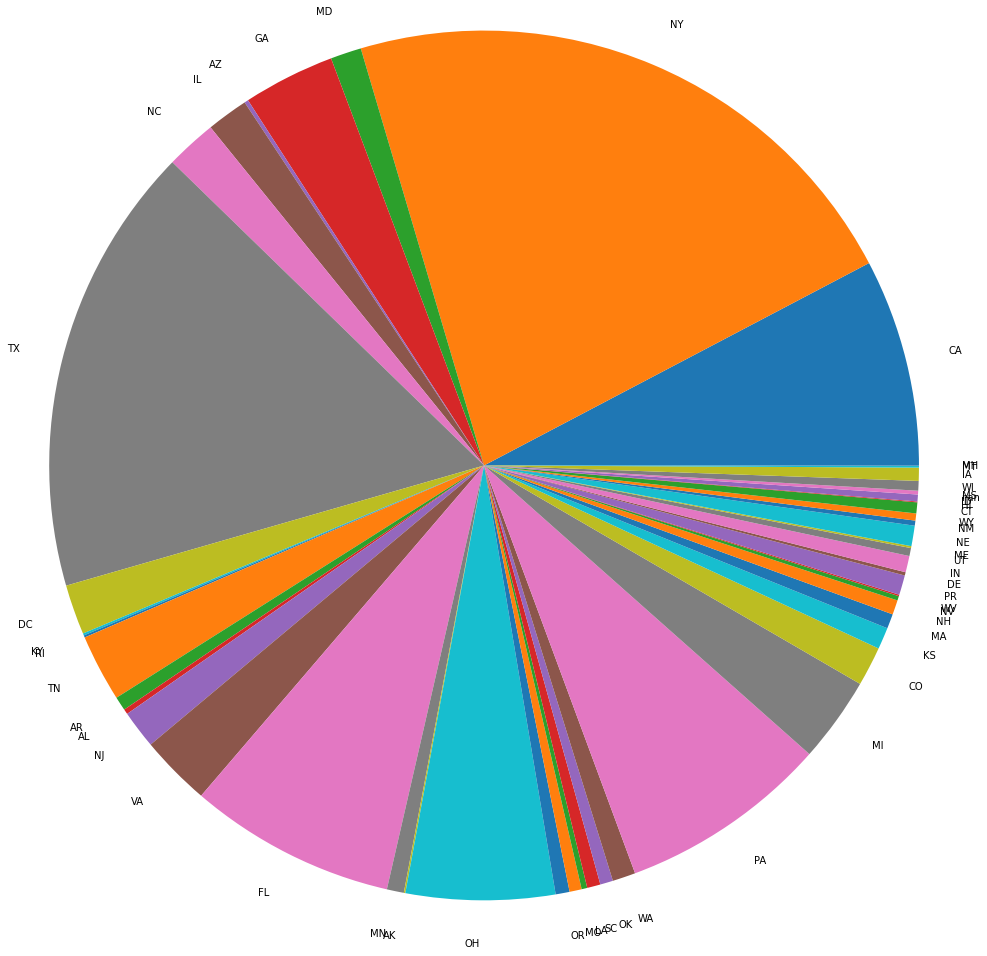

In [84]:
# visualizing states dispute percentages

import matplotlib.pyplot as plt
import numpy as np

y = st_perct.values()
x = st_perct.keys()

plt.pie(y, labels = x, radius=5)
plt.show() 

## Determining Tags with highest dispute rate 

In [85]:
df = pd.read_csv("/Users/abhinav_chinta/Code/Abhinav-Chinta-Quant-OA/eda-consumer-finance/consumer_complaints.csv")
tags = df['tags'].unique()

# generating tag data percentages 
tag_data = {}
temp = df.groupby('tags').size()

for tag in tags:
    if isinstance(tag, str):
        tag_data[tag] = count_dispute(tag, 10) / temp[tag] * 100
print(tag_data)


{'Older American': 21.375698786927988, 'Servicemember': 20.896145813556107, 'Older American, Servicemember': 20.480603109784827}


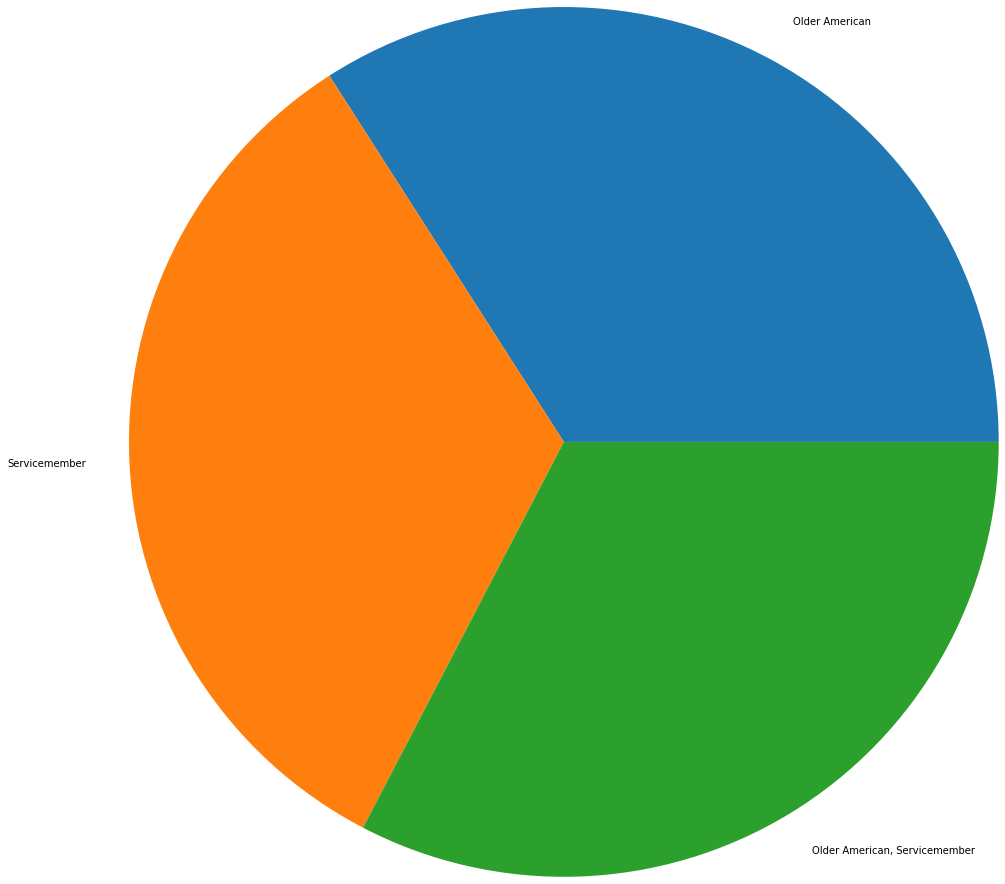

In [86]:
# visualizing tag dispute percentages using a pie chart

import matplotlib.pyplot as plt
import numpy as np

y = tag_data.values()
x = tag_data.keys()

plt.pie(y, labels = x, radius=5)
plt.show() 

##  Finding the most common language / keywords that companies used in their personal statements 

In [87]:
# concatenate all company responses
# creating a string with all company responses
text = ""
for line in df["company_public_response"]:
    if isinstance(line, str):
        for word in line.split():
            if len(word) > 3:
                text += word + " "



In [88]:
# finding keywords using spacy

import spacy
nlp = spacy.load("en_core_sci_lg")

# splitting the text into 5 packets 
doc = nlp(text[:len(text) // 5])



In [89]:
# Printing all unique keywords

keywords = list(map(str, doc.ents))
print(set(keywords))


{'complaint Company believes complaint', 'disputes', 'complaint', 'policy procedure Company', 'discontinued', 'contract Company cho', 'policy procedure', 'consumers Company', 'Company', 'public response', 'isolated error', "complaint Company can't", 'improvement', 'control direction company Company', 'complaint Company', 'actions', 'contract Company', 'isolated error Company', 'public response Company'}


## Features considered 
- Product
- Sub_product
- Issue
- sub_issue
- company_response_to_consumer
- timely_response

## Building a model that takes in relevant features and the company's closure method to predict if the consumer is going to dispute it or not

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

rev_df = df[['product','sub_product','issue','sub_issue','company_response_to_consumer','timely_response']]

for column in rev_df:
    rev_df[column] = rev_df[column].fillna("N")

In [91]:
# split data in train/test

for feature in rev_df.columns:
        le = preprocessing.LabelEncoder()
        le = le.fit(rev_df[feature])
        rev_df[feature] = le.transform(rev_df[feature])

X = rev_df
y = df['consumer_disputed?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train.head()

,product,sub_product,issue,sub_issue,company_response_to_consumer,timely_response
533331,4,19,25,66,0,0
209676,3,27,52,55,1,1
445886,2,27,69,36,2,1
483953,4,13,49,17,1,1
178691,4,7,26,20,3,1


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4], 
              'max_features': ['auto'], 
              'criterion': ['entropy'],
              'max_depth': [5], 
              'min_samples_split': [3],
              'min_samples_leaf': [1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, refit=True)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7957856680336715


## Prediction accuracy of the RandomForest Classifier
### 0.7993650622346932

## Future Scope
- Generate a metric to determine products to sell in each state, miniminzing complaints
- Determining the best company response to a given consumer complaint
- Finding the best closure method for the bank